**Import Libraries**

In [45]:
import random
import numpy as np

**Initialization**

In [46]:
POPULATION_SIZE = 100
NB_GENES = 8   # total number of weights
MUTATION_RATE = 0.01
CROSSING_RATE = 0.6

**ReLU function**

In [47]:
def relu(x):
    return max(0, x)

**Initialize Population**

In [48]:
def initialize_population():
    return [[random.uniform(-1, 1) for _ in range(NB_GENES)] for _ in range(POPULATION_SIZE)]

**Fitness function**

In [49]:
def fitness(chromosome, inputs, desired_output):
    # Input → Hidden (2 neurons)
    hidden_outputs = []
    for j in range(2):
        val = 0
        for i in range(3):
            val += inputs[i] * chromosome[j*3 + i]  # 3 weights per hidden neuron
        hidden_outputs.append(relu(val))

    # Hidden → Output (1 neuron)
    output_val = 0
    for j in range(2):
        output_val += hidden_outputs[j] * chromosome[6 + j]  # last 2 weights
    output_val = relu(output_val)

    # Error & fitness
    error = abs(desired_output - output_val)
    return 1 / error if error != 0 else float('inf')


**Selection (Roulette Wheel)**

In [50]:
def roulette_selection(population, inputs, desired_output):
    # Compute fitness of each chromosome
    fitness_values = [fitness(ind, inputs, desired_output) for ind in population]
    total_fitness = sum(fitness_values)

    # Random pick in proportion to fitness
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, ind in enumerate(population):
        current += fitness_values[i]
        if current >= pick:
            return ind
    return population[-1]  # fallback


**One-Point Crossover**

In [51]:
def crossover(parent1, parent2):
    if random.random() < CROSSING_RATE:
        point = random.randint(1, NB_GENES - 1)  # crossover point
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    else:
      return parent1[:], parent2[:]

**Mutation**

In [52]:
def mutate(chromosome):
    child = chromosome[:]
    if random.random() < MUTATION_RATE:
        point = random.randint(0, NB_GENES - 1)
        mutation_value = random.uniform(-0.2, 0.2)
        child[point] += mutation_value
        # Keep values between -1 and 1
        child[point] = max(-1, min(1, child[point]))
    return child


**Elitism (Keep Best Individuals)**

In [53]:
def elitism(old_pop, new_pop, inputs, desired_output):
    # Merge populations
    merged = old_pop + new_pop
    # Sort by fitness (descending)
    merged.sort(key=lambda ind: fitness(ind, inputs, desired_output), reverse=True)
    # Keep the best POPULATION_SIZE
    return merged[:POPULATION_SIZE]


**Main Genetic Algorithm Loop**

In [56]:
import matplotlib.pyplot as plt

def genetic_algorithm(inputs, desired_output, max_fitness=100, max_iter=100):
    population = initialize_population()
    best_chromosome = None
    best_fitness_per_gen = []  # ← list to save best fitness

    for iteration in range(max_iter):
        # Check best individual
        best_chromosome = max(population, key=lambda ind: fitness(ind, inputs, desired_output))
        best_fit = fitness(best_chromosome, inputs, desired_output)
        best_fitness_per_gen.append(best_fit)  # ← save it

        print(f"Iteration {iteration+1} | Best Fitness: {best_fit:.4f}")

        if best_fit >= max_fitness:
            break

        # Create new population
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            parent1 = roulette_selection(population, inputs, desired_output)
            parent2 = roulette_selection(population, inputs, desired_output)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.append(child1)
            new_population.append(child2)

        # Elitism replacement
        population = elitism(population, new_population, inputs, desired_output)

    return best_chromosome, best_fitness_per_gen

**Run a Test**

Iteration 1 | Best Fitness: 70.3051
Iteration 2 | Best Fitness: 70.3051
Iteration 3 | Best Fitness: 614.3648
Iteration 4 | Best Fitness: 614.3648
Iteration 5 | Best Fitness: 614.3648
Iteration 6 | Best Fitness: 614.3648
Iteration 7 | Best Fitness: 614.3648
Iteration 8 | Best Fitness: 614.3648
Iteration 9 | Best Fitness: 614.3648
Iteration 10 | Best Fitness: 614.3648
Iteration 11 | Best Fitness: 614.3648
Iteration 12 | Best Fitness: 614.3648
Iteration 13 | Best Fitness: 614.3648
Iteration 14 | Best Fitness: 614.3648
Iteration 15 | Best Fitness: 614.3648
Iteration 16 | Best Fitness: 614.3648
Iteration 17 | Best Fitness: 614.3648
Iteration 18 | Best Fitness: 614.3648
Iteration 19 | Best Fitness: 614.3648
Iteration 20 | Best Fitness: 614.3648
Iteration 21 | Best Fitness: 614.3648
Iteration 22 | Best Fitness: 614.3648
Iteration 23 | Best Fitness: 614.3648
Iteration 24 | Best Fitness: 614.3648
Iteration 25 | Best Fitness: 614.3648
Iteration 26 | Best Fitness: 614.3648
Iteration 27 | Best Fit

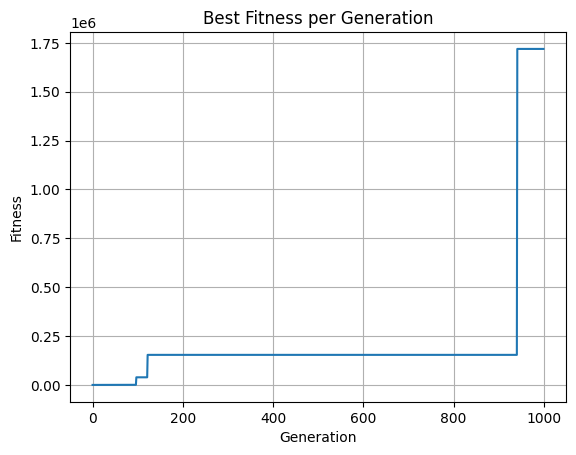

In [68]:
# Run GA
x = [0.5, -0.3, 0.8]
y = 0.7
best, fitness_history = genetic_algorithm(x, y, max_fitness=10000000, max_iter=1000)

print("\nBest chromosome found:", best)
print("Fitness:", fitness(best, x, y))

# Plot fitness over generations
plt.plot(fitness_history)
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid(True)
plt.show()